In [1]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
## from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

In [2]:
import seaborn as sns 
from sklearn.model_selection import train_test_split                # To split the data in training and testing part     
from sklearn.linear_model import LinearRegression

In [3]:
train_data = pd.read_csv(r'C:\Users\sumit.agarwal3\Documents\Data Science\Air POllution\beijing_train.csv', index_col=0) 
print('Data Shape:', train_data.shape)
train_data.head()

Data Shape: (403776, 17)


,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
REF_NO,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.00000,4.00000,4.00000,7.00000,300.00000,77.00000,-0.70000,1023.00000,-18.80000,0.00000,NNW,4.40000,Aotizhongxin
2,2013,3,1,1,8.00000,8.00000,4.00000,7.00000,300.00000,77.00000,-1.10000,1023.20000,-18.20000,0.00000,N,4.70000,Aotizhongxin
3,2013,3,1,2,7.00000,7.00000,5.00000,10.00000,300.00000,73.00000,-1.10000,1023.50000,-18.20000,0.00000,NNW,5.60000,Aotizhongxin
4,2013,3,1,3,6.00000,6.00000,11.00000,11.00000,300.00000,72.00000,-1.40000,1024.50000,-19.40000,0.00000,NW,3.10000,Aotizhongxin
5,2013,3,1,4,3.00000,3.00000,12.00000,12.00000,300.00000,72.00000,-2.00000,1025.20000,-19.50000,0.00000,N,2.00000,Aotizhongxin


In [4]:
train_data.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.00000,403776.00000,403776.00000,403776.00000,395301.00000,397554.00000,395000.00000,391917.00000,383515.00000,390769.00000,403512.00000,403511.00000,403507.00000,403515.00000,403538.00000
mean,2014.56419,6.73538,15.74822,11.50000,79.24828,104.32790,15.73306,50.35278,1214.84334,58.11933,14.08890,1010.28253,3.15729,0.06705,1.71838
std,1.09750,3.35648,8.80889,6.92220,79.14671,90.13640,21.73946,34.77191,1124.28568,57.37597,11.30353,10.35678,13.61727,0.83784,1.23796
min,2013.00000,1.00000,1.00000,0.00000,2.00000,2.00000,0.28560,1.02650,100.00000,0.21420,-19.90000,982.40000,-43.40000,0.00000,0.00000
25%,2014.00000,4.00000,8.00000,5.75000,21.00000,36.00000,2.00000,23.00000,500.00000,11.00000,4.00000,1002.00000,-8.00000,0.00000,0.90000
50%,2015.00000,7.00000,16.00000,11.50000,55.00000,83.00000,7.00000,43.00000,900.00000,45.00000,15.40000,1009.80000,4.20000,0.00000,1.40000
75%,2016.00000,10.00000,23.00000,17.25000,110.00000,145.00000,19.00000,71.00000,1500.00000,83.00000,23.50000,1018.30000,15.50000,0.00000,2.20000
max,2016.00000,12.00000,31.00000,23.00000,999.00000,999.00000,500.00000,290.00000,10000.00000,1071.00000,41.60000,1042.80000,29.10000,72.50000,13.20000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    395301 non-null  float64
 5   PM10     397554 non-null  float64
 6   SO2      395000 non-null  float64
 7   NO2      391917 non-null  float64
 8   CO       383515 non-null  float64
 9   O3       390769 non-null  float64
 10  TEMP     403512 non-null  float64
 11  PRES     403511 non-null  float64
 12  DEWP     403507 non-null  float64
 13  RAIN     403515 non-null  float64
 14  wd       402387 non-null  object 
 15  WSPM     403538 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 55.5+ MB


In [13]:
# Deleting Unrequired columns from zomato dataset
    train_data.drop(['year', 'month', 'day'], axis = 1, inplace = True)

In [32]:
train_data.drop(['hour'], axis = 1, inplace = True)

In [405]:
train_data['station'].value_counts()

Wanliu           33191
Guanyuan         33036
Nongzhanguan     32998
Tiantan          32943
Wanshouxigong    32933
Gucheng          32883
Dongsi           32881
Changping        32777
Dingling         32768
Aotizhongxin     32689
Huairou          32457
Shunyi           32379
Name: station, dtype: int64

<AxesSubplot:>

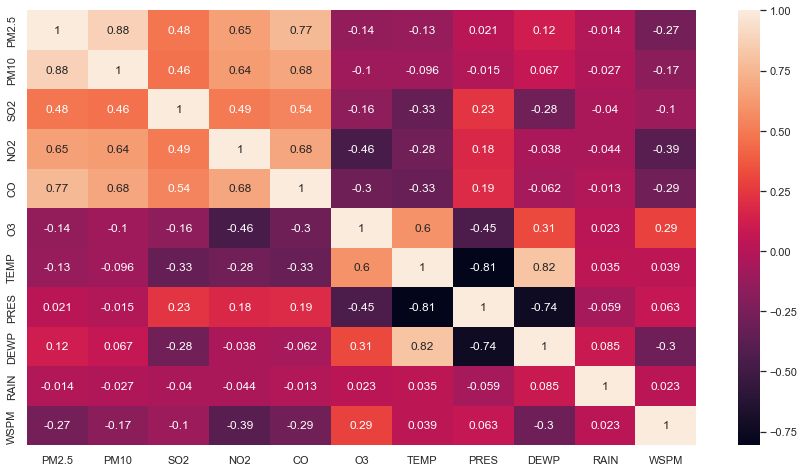

In [49]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(train_data.corr(), annot=True)

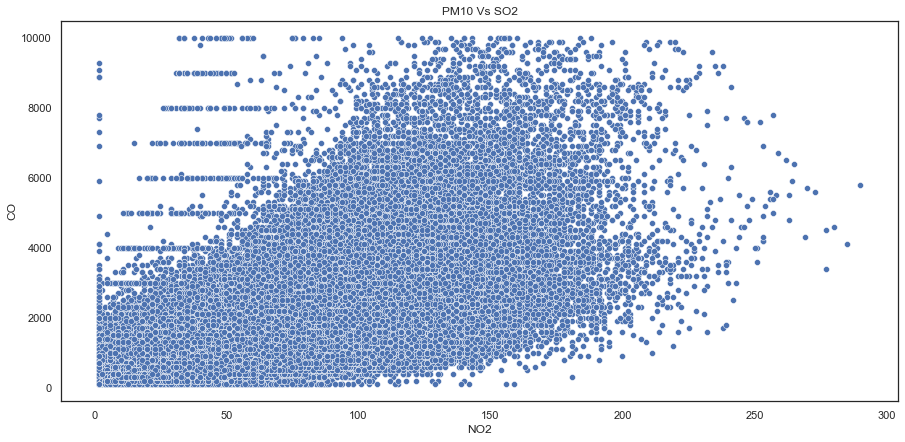

In [25]:
# Scatter Plot for understanding Cause Effect Relationship between Count of Votes, Average Cost for two & Rating
sns.set(style='white')
figure = plt.figure(figsize=[15, 7])
sns.scatterplot(x=train_data['NO2'],y=train_data['CO'])
plt.title("PM10 Vs SO2")
plt.ylabel("CO")
plt.show()

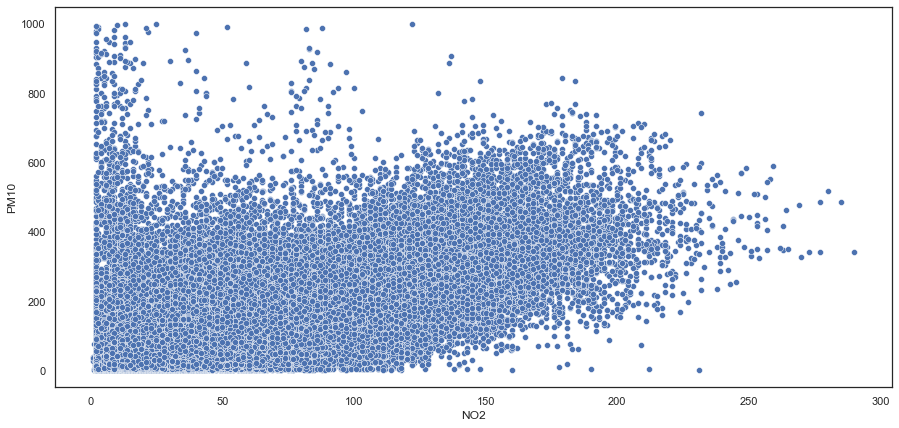

In [26]:
# Scatter Plot for understanding Cause Effect Relationship between Count of Votes, Average Cost for two & Rating
sns.set(style='white')
figure = plt.figure(figsize=[15, 7])
sns.scatterplot(x=train_data['NO2'],y=train_data['PM10'])
# plt.title("PM10 Vs SO2")
plt.ylabel("PM10")
plt.show()

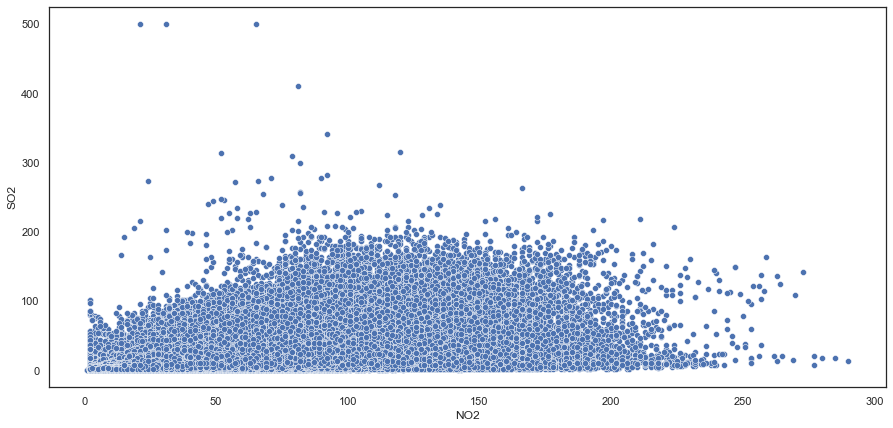

In [27]:
# Scatter Plot for understanding Cause Effect Relationship between Count of Votes, Average Cost for two & Rating
sns.set(style='white')
figure = plt.figure(figsize=[15, 7])
sns.scatterplot(x=train_data['NO2'],y=train_data['SO2'])
# plt.title("PM10 Vs SO2")
plt.ylabel("SO2")
plt.show()

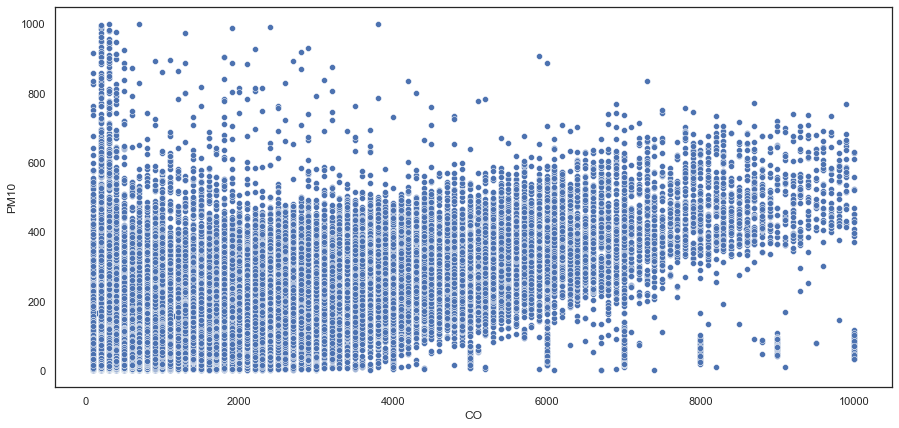

In [28]:
# Scatter Plot for understanding Cause Effect Relationship between Count of Votes, Average Cost for two & Rating
sns.set(style='white')
figure = plt.figure(figsize=[15, 7])
sns.scatterplot(x=train_data['CO'],y=train_data['PM10'])
# plt.title("PM10 Vs SO2")
plt.ylabel("PM10")
plt.show()

In [34]:
## Deleting records where WD is blank
train_data.dropna(subset=['wd'], inplace = True)

In [35]:
len(train_data)

402387

In [36]:
## Deleting records where PM2.5 is blank
train_data.dropna(subset=['PM2.5'], inplace = True)

In [37]:
len(train_data)

393935

In [38]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393935 entries, 1 to 33648
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   PM2.5    393935 non-null  float64
 1   PM10     393726 non-null  float64
 2   SO2      390267 non-null  float64
 3   NO2      387237 non-null  float64
 4   CO       379007 non-null  float64
 5   O3       385882 non-null  float64
 6   TEMP     393907 non-null  float64
 7   PRES     393908 non-null  float64
 8   DEWP     393904 non-null  float64
 9   RAIN     393905 non-null  float64
 10  wd       393935 non-null  object 
 11  WSPM     393935 non-null  float64
 12  station  393935 non-null  object 
dtypes: float64(11), object(2)
memory usage: 42.1+ MB


In [44]:
train_data.isnull().sum()

PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [43]:
## Filing in the blank Values
train_data['PM10'].fillna(train_data['PM10'].median(), inplace = True)
train_data['SO2'].fillna(train_data['SO2'].median(), inplace = True)
train_data['NO2'].fillna(train_data['NO2'].median(), inplace = True)
train_data['CO'].fillna(train_data['CO'].median(), inplace = True)
train_data['O3'].fillna(train_data['O3'].median(), inplace = True)

train_data['TEMP'].fillna(train_data['TEMP'].median(), inplace = True)
train_data['PRES'].fillna(train_data['PRES'].median(), inplace = True)
train_data['DEWP'].fillna(train_data['DEWP'].median(), inplace = True)
train_data['RAIN'].fillna(train_data['RAIN'].median(), inplace = True)

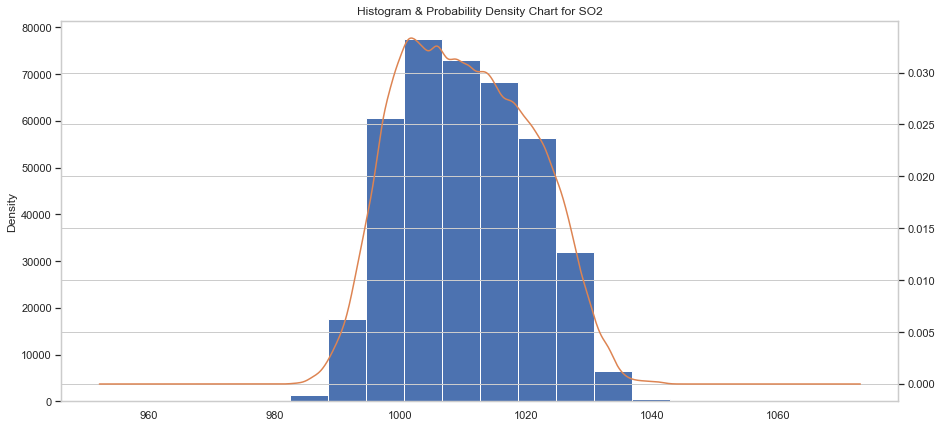

In [406]:
#Plotting Histogram & Kernel Density Estimation for Average Cost for two.
figure = plt.figure(figsize=[15, 7])
ax = train_data['PRES'].plot(kind='hist')
#figure = plt.figure(figsize=[15, 7])
train_data['PRES'].plot(kind='kde', ax = ax, secondary_y=True)
plt.title('Histogram & Probability Density Chart for SO2')
plt.show()

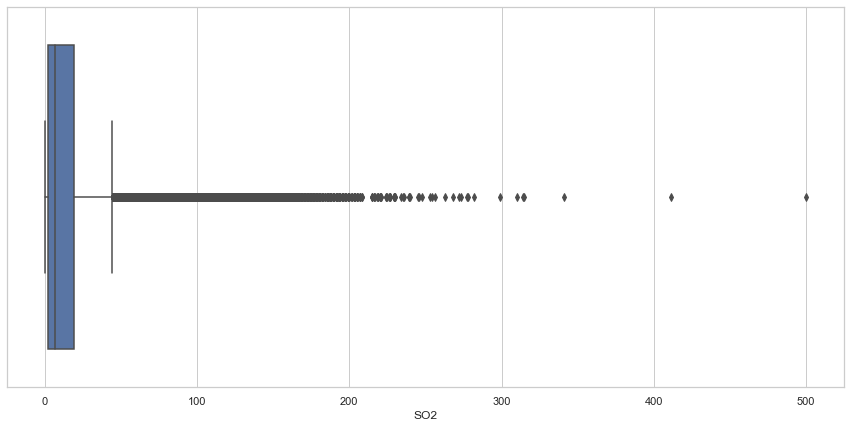

In [48]:
sns.set_theme(style="whitegrid")
figure = plt.figure(figsize=[15, 7])

ax = sns.boxplot(x=train_data['SO2'])

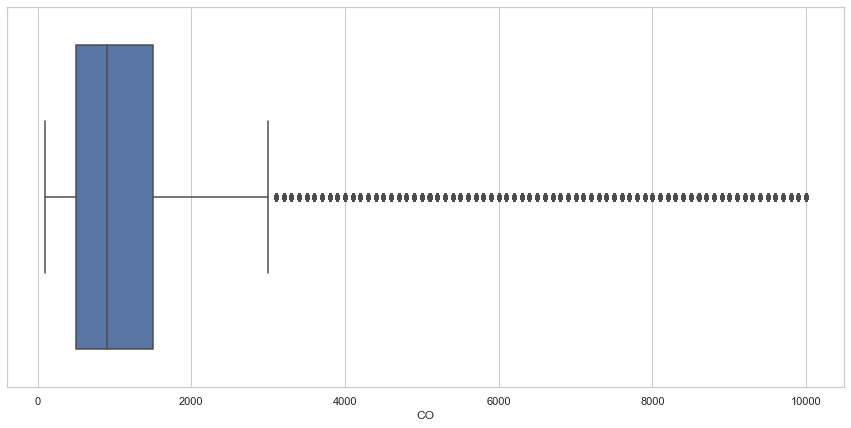

In [50]:
sns.set_theme(style="whitegrid")
figure = plt.figure(figsize=[15, 7])

ax = sns.boxplot(x=train_data['CO'])

In [354]:
train_data.drop(['wd'],axis = 1,  inplace = True)

In [355]:
train_encoded_data_Model1 = pd.get_dummies(train_data) 
train_encoded_data_Model1.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,station_Aotizhongxin,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
REF_NO,,,,,,,,,,,,,,,,,,,,,,,
1,4.00000,4.00000,4.00000,7.00000,300.00000,77.00000,-0.70000,1023.00000,-18.80000,0.00000,4.40000,1,0,0,0,0,0,0,0,0,0,0,0
2,8.00000,8.00000,4.00000,7.00000,300.00000,77.00000,-1.10000,1023.20000,-18.20000,0.00000,4.70000,1,0,0,0,0,0,0,0,0,0,0,0
3,7.00000,7.00000,5.00000,10.00000,300.00000,73.00000,-1.10000,1023.50000,-18.20000,0.00000,5.60000,1,0,0,0,0,0,0,0,0,0,0,0
4,6.00000,6.00000,11.00000,11.00000,300.00000,72.00000,-1.40000,1024.50000,-19.40000,0.00000,3.10000,1,0,0,0,0,0,0,0,0,0,0,0
5,3.00000,3.00000,12.00000,12.00000,300.00000,72.00000,-2.00000,1025.20000,-19.50000,0.00000,2.00000,1,0,0,0,0,0,0,0,0,0,0,0


In [373]:
## Final List of Columns to be Deleted was identified after creating number of models with different combinations of Features
## This is the final list of features which were deleted
train_encoded_data_Model1.drop(['PRES'],axis = 1,  inplace = True)
train_encoded_data_Model1.drop(['RAIN'],axis = 1,  inplace = True)
train_encoded_data_Model1.drop(['O3'],axis = 1,  inplace = True)
train_encoded_data_Model1.drop(['TEMP'],axis = 1,  inplace = True)
train_encoded_data_Model1.drop(['DEWP'],axis = 1,  inplace = True)

In [374]:
# create a Python list of feature names
X = train_encoded_data_Model1.iloc[:,1:]  
X.head()

,PM10,SO2,NO2,CO,WSPM,station_Aotizhongxin,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
REF_NO,,,,,,,,,,,,,,,,,
1,4.00000,4.00000,7.00000,300.00000,4.40000,1,0,0,0,0,0,0,0,0,0,0,0
2,8.00000,4.00000,7.00000,300.00000,4.70000,1,0,0,0,0,0,0,0,0,0,0,0
3,7.00000,5.00000,10.00000,300.00000,5.60000,1,0,0,0,0,0,0,0,0,0,0,0
4,6.00000,11.00000,11.00000,300.00000,3.10000,1,0,0,0,0,0,0,0,0,0,0,0
5,3.00000,12.00000,12.00000,300.00000,2.00000,1,0,0,0,0,0,0,0,0,0,0,0


In [375]:
y = train_encoded_data_Model1['PM2.5']
y.head()

REF_NO
1   4.00000
2   8.00000
3   7.00000
4   6.00000
5   3.00000
Name: PM2.5, dtype: float64

In [376]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=1)

In [377]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (315148, 17)
y_train shape:  (315148,)

Test cases as below
X_test shape:  (78787, 17)
y_test shape:  (78787,)


In [378]:
linreg = LinearRegression()
linreg.fit(X_train, y_train) 

LinearRegression()

In [379]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: -0.39907475874895226
Coefficients: [ 0.5795663   0.03868544  0.02127447  0.02069075 -4.33209761 -1.33152304
 -0.54232895  6.0547724   1.88438758 -0.41001609 -7.96350075  1.79320025
  0.67213413  4.52882433  0.73120137 -2.81377182 -2.60337942]


In [380]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)    

In [381]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept -0.39907475874895226
Intercept 0.5795663018650884
Intercept 0.038685440766619665
Intercept 0.0212744731305652
Intercept 0.02069075241005111
Intercept -4.332097610799619
Intercept -1.3315230435349734
Intercept -0.5423289497806286
Intercept 6.054772403983232
Intercept 1.8843875764545712
Intercept -0.4100160856952941
Intercept -7.963500746300217
Intercept 1.7932002488528842


In [382]:
y_pred_train = linreg.predict(X_train)  

In [383]:
y_pred_test = linreg.predict(X_test)   

Text(0, 0.5, 'Predicted Values')

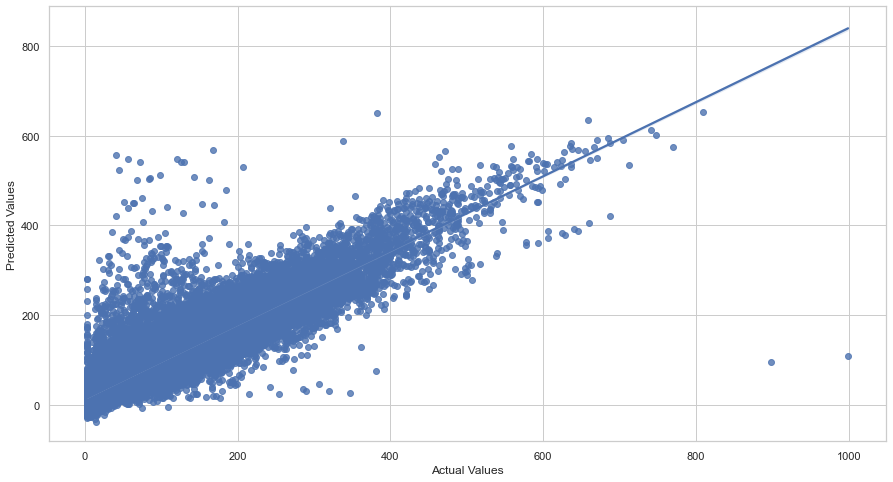

In [384]:
sns.regplot(y_test,y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [385]:

analysisdftemp = pd.DataFrame(y_pred_test)

In [386]:
analysisdftemp.head()

,0
0,41.42446
1,207.04601
2,-0.42602
3,234.77501
4,13.96858


In [387]:
analysisdf['predPM2.5'] = analysisdftemp[0]

In [388]:
y_test.head()

REF_NO
6420     53.00000
17211   189.00000
15421     5.00000
24824   281.00000
4654      9.00000
Name: PM2.5, dtype: float64

In [389]:
test_list = list(y_test)
analysisdf['Actiuals'] = test_list

In [390]:
df = pd.DataFrame(y_pred_test)

In [391]:
df[df[0]<0].count()

0    2748
dtype: int64

In [66]:
from sklearn import metrics

In [350]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 21.262851876180136
MAE for test set is 21.164966112601387


In [351]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 1081.6011259323654
MSE for test set is 1080.3105448165156


In [352]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 32.88770478358691
RMSE for test set is 32.86807789963562


In [392]:
r2_train = metrics.r2_score(y_train,y_pred_train)
r2_test = metrics.r2_score(y_test,y_pred_test)
print("R2 score for training set is {}".format(r2_train))
print("R2 score for test set is {}".format(r2_test))

adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_test = 1 - (1-r2_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for test set is {}".format(adj_r_squared_test))

R2 score for training set is 0.8264353114373578
R2 score for test set is 0.8262773369086218
Adjusted R2 score for training set is 0.82642594831831
Adjusted R2 score for test set is 0.8262398439193424


# Generating PM2.5 on Provided Test Data

In [394]:
df_Poll_test = pd.read_csv(r'C:\Users\sumit.agarwal3\Documents\Data Science\Air POllution\beijing_test.csv', index_col=0) 
print('Data Shape:', df_Poll_test.shape)
df_Poll_test.head()

Data Shape: (16728, 16)


,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
REF_NO,,,,,,,,,,,,,,,,
33649,2017,1,1,0,496.00000,8.00000,121.00000,6100.00000,4.00000,-4.70000,1022.10000,-6.10000,0.00000,ENE,1.00000,Aotizhongxin
33650,2017,1,1,1,497.00000,7.00000,113.00000,6300.00000,4.00000,-5.20000,1022.30000,-6.40000,0.00000,E,0.70000,Aotizhongxin
33651,2017,1,1,2,469.00000,7.00000,111.00000,6200.00000,4.00000,-5.40000,1022.50000,-6.50000,0.00000,ENE,1.10000,Aotizhongxin
33652,2017,1,1,3,425.00000,6.00000,109.00000,5900.00000,3.00000,-5.20000,1022.50000,-6.20000,0.00000,E,1.10000,Aotizhongxin
33653,2017,1,1,4,468.00000,10.00000,123.00000,7700.00000,16.00000,-5.00000,1021.90000,-5.80000,0.00000,ENE,1.00000,Aotizhongxin


In [211]:
df_Poll_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 33649 to 35064
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     16728 non-null  int64  
 1   month    16728 non-null  int64  
 2   day      16728 non-null  int64  
 3   hour     16728 non-null  int64  
 4   PM10     16728 non-null  float64
 5   SO2      16728 non-null  float64
 6   NO2      16728 non-null  float64
 7   CO       16728 non-null  float64
 8   O3       16728 non-null  float64
 9   TEMP     16728 non-null  float64
 10  PRES     16728 non-null  float64
 11  DEWP     16728 non-null  float64
 12  RAIN     16728 non-null  float64
 13  wd       16728 non-null  object 
 14  WSPM     16728 non-null  float64
 15  station  16728 non-null  object 
dtypes: float64(10), int64(4), object(2)
memory usage: 2.2+ MB


In [395]:
df_Poll_test.drop(['year', 'month', 'day', 'wd', 'PRES', 'TEMP', 'O3', 'DEWP', 'hour', 'RAIN'], axis = 1, inplace = True)

In [396]:
test_encoded_data_Model1 = pd.get_dummies(df_Poll_test) 
test_encoded_data_Model1.head()

,PM10,SO2,NO2,CO,WSPM,station_Aotizhongxin,station_Changping,station_Dingling,station_Dongsi,station_Guanyuan,station_Gucheng,station_Huairou,station_Nongzhanguan,station_Shunyi,station_Tiantan,station_Wanliu,station_Wanshouxigong
REF_NO,,,,,,,,,,,,,,,,,
33649,496.00000,8.00000,121.00000,6100.00000,1.00000,1,0,0,0,0,0,0,0,0,0,0,0
33650,497.00000,7.00000,113.00000,6300.00000,0.70000,1,0,0,0,0,0,0,0,0,0,0,0
33651,469.00000,7.00000,111.00000,6200.00000,1.10000,1,0,0,0,0,0,0,0,0,0,0,0
33652,425.00000,6.00000,109.00000,5900.00000,1.10000,1,0,0,0,0,0,0,0,0,0,0,0
33653,468.00000,10.00000,123.00000,7700.00000,1.00000,1,0,0,0,0,0,0,0,0,0,0,0


In [397]:
test_encoded_data_Model1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 33649 to 35064
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PM10                   16728 non-null  float64
 1   SO2                    16728 non-null  float64
 2   NO2                    16728 non-null  float64
 3   CO                     16728 non-null  float64
 4   WSPM                   16728 non-null  float64
 5   station_Aotizhongxin   16728 non-null  uint8  
 6   station_Changping      16728 non-null  uint8  
 7   station_Dingling       16728 non-null  uint8  
 8   station_Dongsi         16728 non-null  uint8  
 9   station_Guanyuan       16728 non-null  uint8  
 10  station_Gucheng        16728 non-null  uint8  
 11  station_Huairou        16728 non-null  uint8  
 12  station_Nongzhanguan   16728 non-null  uint8  
 13  station_Shunyi         16728 non-null  uint8  
 14  station_Tiantan        16728 non-null  uint8  
 15

In [398]:
y_pred_test_actuals = linreg.predict(test_encoded_data_Model1)   

In [399]:
df11 = pd.DataFrame(y_pred_test_actuals)
df11.head()

,0
0,410.49947
1,416.30794
2,396.23562
3,364.44624
4,427.49674


In [400]:
df_Poll_test['PM2.5'] = y_pred_test_actuals

In [408]:
df_Poll_test.drop(['PM10', 'SO2', 'NO2', 'CO', 'WSPM', 'station'], axis = 1, inplace = True)

In [411]:
df_Poll_test.to_csv(r'C:\Users\sumit.agarwal3\Documents\Data Science\Air POllution\submission.csv.csv', encoding='utf-8', index=True, header=False)